### Load Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM
from tqdm.notebook import tqdm

### Read the dataset

In [3]:
dataset = pd.read_excel('DATASET KOMODITAS GROCERY + KATEGORI.xlsx')

In [25]:
# change commodity here
komoditas = 3

In [26]:
isan = dataset.iloc[0:, 5:].transpose()
print(isan.shape)

(108, 87)


In [27]:
data = isan.iloc[0:, komoditas:komoditas+1]
data

,3
2013-01-01,6047
2013-02-01,6281
2013-03-01,6347
2013-04-01,6270
2013-05-01,6379
...,...
2021-08-01,9242
2021-09-01,9466
2021-10-01,9502
2021-11-01,9442


### Parameter: Lookback 12 month windows

In [28]:
lookback_window = 12

### Convert Data into Numpy Array

In [29]:
data = data.values

In [30]:
len(data)

108

### Convert in to X, y format

In [31]:
x = []
y = []
for i in tqdm(range(lookback_window, len(data))):
    x.append(data[i - lookback_window:i])
    y.append(data[i])

  0%|          | 0/96 [00:00<?, ?it/s]

### Generate Array of list x and y

In [32]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(96, 12, 1)
(96, 1)


### Load Model

In [33]:
model = tf.keras.models.load_model('LSTM_Willy.h5')

### Prediction with LSTM Model

In [34]:
predict = model.predict(x)
# TODO: bikin predict 12 bulan

### Plot the Result

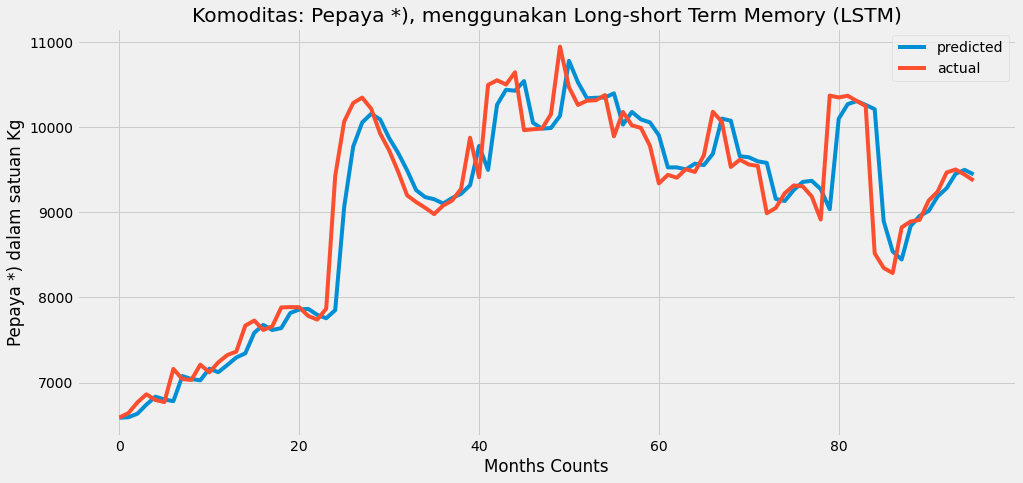

In [35]:
list_komoditas = [i for i in dataset['komoditas']]
list_satuan = [i for i in dataset['satuan']]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Komoditas: {}, menggunakan Long-short Term Memory (LSTM)'.format(list_komoditas[komoditas]))
plt.legend(['predicted', 'actual'])
plt.xlabel("Months Counts")
plt.ylabel("{} dalam satuan {}".format(list_komoditas[komoditas], list_satuan[komoditas]))
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y, predict))
print(rmse)

388.2045979378694


In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y, predict)
print(mape)

0.02480951803322372


### Predict the Future

In [38]:
# prediksi tahun 2021
data_2021 = x[95:]
data_2021

array([[[10247],
        [ 8517],
        [ 8346],
        [ 8286],
        [ 8822],
        [ 8892],
        [ 8910],
        [ 9136],
        [ 9242],
        [ 9466],
        [ 9502],
        [ 9442]]])

In [39]:
predict[95:]

array([[9444.361]], dtype=float32)

In [40]:
#new_x = np.array([])
new_x = np.concatenate((x[95:], predict[95:]), axis=None)
new_x = np.array(new_x)
new_x = np.delete(new_x, 0)
new_x = np.array([new_x.astype(int)])
new_x

array([[8517, 8346, 8286, 8822, 8892, 8910, 9136, 9242, 9466, 9502, 9442,
        9444]])

In [41]:
# predict the future for how long
future_months = 24

new_arr = np.zeros(shape=(1, 12))
new_arr = new_arr.astype(int)
for loop in range(future_months):
    pred_2022 = model.predict(new_x)
    new_x = np.concatenate((new_x, pred_2022), axis=None)
    new_x = np.array(new_x)
    new_x = np.delete(new_x, 0)
    new_x = np.array([new_x.astype(int)])
    new_arr = np.append(new_arr, new_x, axis=0)
new_arr = np.delete(new_arr, 0, 0)

In [42]:
new_y = model.predict(new_arr)
new_y

array([[9395.389 ],
       [9396.68  ],
       [9403.901 ],
       [9414.532 ],
       [9432.075 ],
       [9452.621 ],
       [9476.131 ],
       [9498.45  ],
       [9517.295 ],
       [9534.999 ],
       [9550.565 ],
       [9565.638 ],
       [9580.459 ],
       [9595.469 ],
       [9610.6455],
       [9625.997 ],
       [9641.386 ],
       [9657.571 ],
       [9673.792 ],
       [9689.911 ],
       [9705.956 ],
       [9721.964 ],
       [9737.948 ],
       [9753.939 ]], dtype=float32)

In [43]:
new_y = np.append(predict, new_y, axis=0)

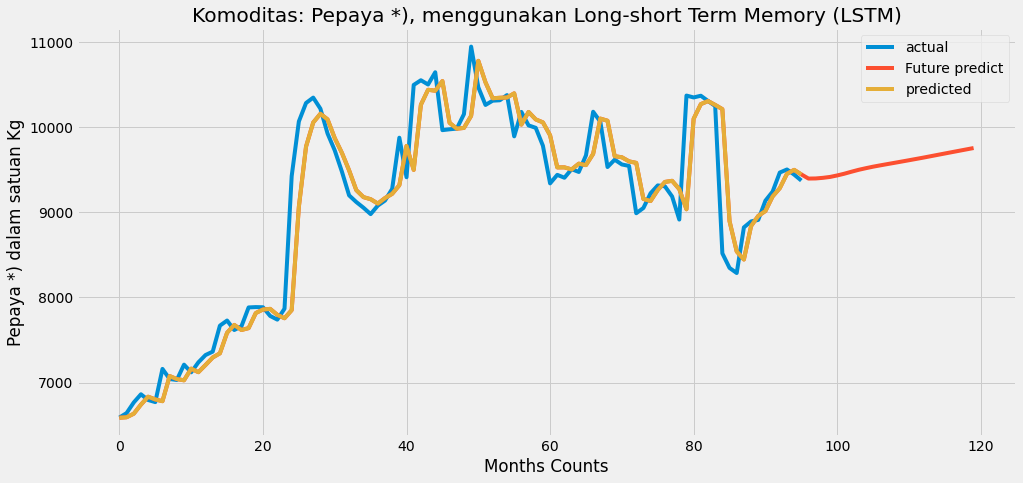

In [44]:
list_komoditas = [i for i in dataset['komoditas']]
list_satuan = [i for i in dataset['satuan']]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(y)
plt.plot(new_y)
plt.plot(predict)
plt.title('Komoditas: {}, menggunakan Long-short Term Memory (LSTM)'.format(list_komoditas[komoditas]))
plt.legend(['actual', 'Future predict', 'predicted'])
plt.xlabel("Months Counts")
plt.ylabel("{} dalam satuan {}".format(list_komoditas[komoditas], list_satuan[komoditas]))
plt.show()